# Importing Required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.arima_model import ARMA
import seaborn as sns
sns.set()

from sklearn.metrics import mean_squared_error
from math import sqrt

import warnings
warnings.filterwarnings("ignore")

# Log-Likelihood Test 

In [2]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.llf
    L2 = mod_2.llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

# Reading the Dataset

### Full Dataset

In [3]:
data = pd.read_csv('web_scrapped_data.csv')
data = data.drop([0], axis=0)
data.Date = pd.to_datetime(data.Date)
data = data.set_index('Date')

data.head()

,spx,dax,ftse,nikkei,spx_norm,dax_norm,ftse_norm,nikkei_norm,spx_ret,ftse_ret,dax_ret,nikkei_ret,spx_ret_norm,ftse_ret_norm,dax_ret_norm,nikkei_ret_norm,spx_vol,dax_vol,ftse_vol,nikkei_vol
Date,,,,,,,,,,,,,,,,,,,,
1994-01-06,467.119995,2220.629883,3403.000000,18124.009766,100.000000,100.000000,100.000000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-01-07,469.899994,2224.949951,3446.000000,18124.009766,100.595136,100.194542,101.263591,100.000000,0.595136,1.263591,0.194542,-2.069078e-09,100.000000,100.000000,100.000000,1.000000e+02,0.354187,0.037847,1.596662,4.281085e-18
1994-01-10,475.269989,2225.000000,3440.600098,18443.439453,101.744732,100.196796,101.104910,101.762467,1.142795,-0.156701,0.002249,1.762467e+00,192.022581,-12.401212,1.156270,-8.518126e+10,1.305981,0.000005,0.024555,3.106290e+00
1994-01-11,474.130005,2228.100098,3413.800049,18485.250000,101.500687,100.336401,100.317368,101.993158,-0.239860,-0.778935,0.139330,2.266960e-01,-40.303454,-61.644578,71.619440,-1.095638e+10,0.057533,0.019413,0.606740,5.139109e-02
1994-01-12,474.170013,2182.060059,3372.000000,18793.880859,101.509252,98.263113,99.089039,103.696042,0.008438,-1.224443,-2.066336,1.669606e+00,1.417879,-96.901880,-1062.151695,-8.069323e+10,0.000071,4.269745,1.499262,2.787584e+00


### Traininig Data

In [4]:
train_df = pd.read_csv('train.csv')
train_df = train_df.drop([0], axis=0)
train_df.Date = pd.to_datetime(train_df.Date)
train_df = train_df.set_index('Date')

train_df.head()

,spx,dax,ftse,nikkei,spx_norm,dax_norm,ftse_norm,nikkei_norm,spx_ret,ftse_ret,dax_ret,nikkei_ret,spx_ret_norm,ftse_ret_norm,dax_ret_norm,nikkei_ret_norm,spx_vol,dax_vol,ftse_vol,nikkei_vol
Date,,,,,,,,,,,,,,,,,,,,
1994-01-06,467.119995,2220.629883,3403.000000,18124.009766,100.000000,100.000000,100.000000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-01-07,469.899994,2224.949951,3446.000000,18124.009766,100.595136,100.194542,101.263591,100.000000,0.595136,1.263591,0.194542,-2.069078e-09,100.000000,100.000000,100.000000,1.000000e+02,0.354187,0.037847,1.596662,4.281085e-18
1994-01-10,475.269989,2225.000000,3440.600098,18443.439453,101.744732,100.196796,101.104910,101.762467,1.142795,-0.156701,0.002249,1.762467e+00,192.022581,-12.401212,1.156270,-8.518126e+10,1.305981,0.000005,0.024555,3.106290e+00
1994-01-11,474.130005,2228.100098,3413.800049,18485.250000,101.500687,100.336401,100.317368,101.993158,-0.239860,-0.778935,0.139330,2.266960e-01,-40.303454,-61.644578,71.619440,-1.095638e+10,0.057533,0.019413,0.606740,5.139109e-02
1994-01-12,474.170013,2182.060059,3372.000000,18793.880859,101.509252,98.263113,99.089039,103.696042,0.008438,-1.224443,-2.066336,1.669606e+00,1.417879,-96.901880,-1062.151695,-8.069323e+10,0.000071,4.269745,1.499262,2.787584e+00


### Testing Data

In [5]:
test_df = pd.read_csv('test.csv')
test_df = test_df.drop([0], axis=0)
test_df.Date = pd.to_datetime(test_df.Date)
test_df = test_df.set_index('Date')

test_df.head()

,spx,dax,ftse,nikkei,spx_norm,dax_norm,ftse_norm,nikkei_norm,spx_ret,ftse_ret,dax_ret,nikkei_ret,spx_ret_norm,ftse_ret_norm,dax_ret_norm,nikkei_ret_norm,spx_vol,dax_vol,ftse_vol,nikkei_vol
Date,,,,,,,,,,,,,,,,,,,,
2014-07-15,1973.280029,9719.410156,6710.500000,15395.160156,422.435359,437.687083,197.193653,84.943455,-0.193210,-0.527714,-0.650103,0.642878,-32.464781,-41.763021,-334.170049,-3.107073e+10,0.037330,0.422634,0.278482,0.413292
2014-07-16,1981.569946,9859.269531,6784.700195,15379.299805,424.210046,443.985268,199.374087,84.855945,0.420108,1.105733,1.438970,-0.103022,70.590347,87.507175,739.668688,4.979110e+09,0.176491,2.070634,1.222645,0.010613
2014-07-17,1958.119995,9753.879883,6738.299805,15370.259766,419.189933,439.239333,198.010573,84.806066,-1.183403,-0.683897,-1.068940,-0.058781,-198.845784,-54.123325,-549.463410,2.840906e+09,1.400442,1.142632,0.467716,0.003455
2014-07-18,1978.219971,9720.019531,6749.500000,15215.709961,423.492891,437.714524,198.339700,83.953331,1.026494,0.166217,-0.347148,-1.005512,172.480531,13.154331,-178.443043,4.859710e+10,1.053689,0.120511,0.027628,1.011054
2014-07-21,1973.630005,9612.049805,6728.399902,15215.709961,422.510281,432.852403,197.719656,83.953331,-0.232025,-0.312617,-1.110797,0.000000,-38.986902,-24.740380,-570.979380,-0.000000e+00,0.053836,1.233871,0.097730,0.000000


# ACF and PACF Plot Function

In [6]:
def acf_pacf(series, label_str):
    plt.rcParams['figure.figsize'] = 20, 5
    fig, (ax0, ax1) = plt.subplots(1, 2)

    sgt.plot_acf(series, zero = False, lags = 40, ax=ax0)
    ax0.set_title("ACF for "+label_str, size = 20)

    sgt.plot_pacf(series, zero = False, lags = 40, ax=ax1)
    ax1.set_title("PACF for "+label_str, size = 20)

    plt.show()

# MA For SPX Returns

#### ACF and PACF Plots for SPX Returns

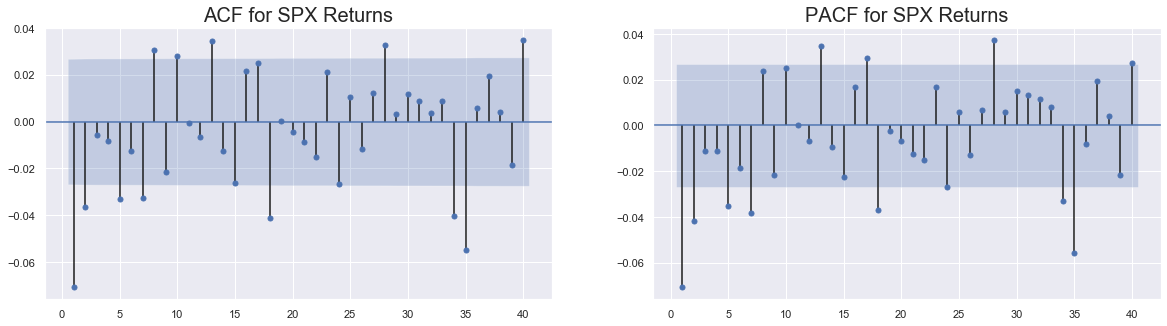

In [7]:
acf_pacf(train_df.spx_ret[1:], "SPX Returns")

#### Defining Max Lags based on ACF and PACF plots

In [8]:
max_lags = 10

#### Fitting all models with lags $<=$ max_lags

MA(1) MODEL
                              ARMA Model Results                              
Dep. Variable:                spx_ret   No. Observations:                 5352
Model:                     ARMA(0, 1)   Log Likelihood               -8484.544
Method:                       css-mle   S.D. of innovations              1.181
Date:                Sat, 13 Jun 2020   AIC                          16975.088
Time:                        15:04:12   BIC                          16994.843
Sample:                    01-07-1994   HQIC                         16981.988
                         - 07-14-2014                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0340      0.015      2.279      0.023       0.005       0.063
ma.L1.spx_ret    -0.0768      0.014     -5.412      0.000      -0.105      -0.049
                            

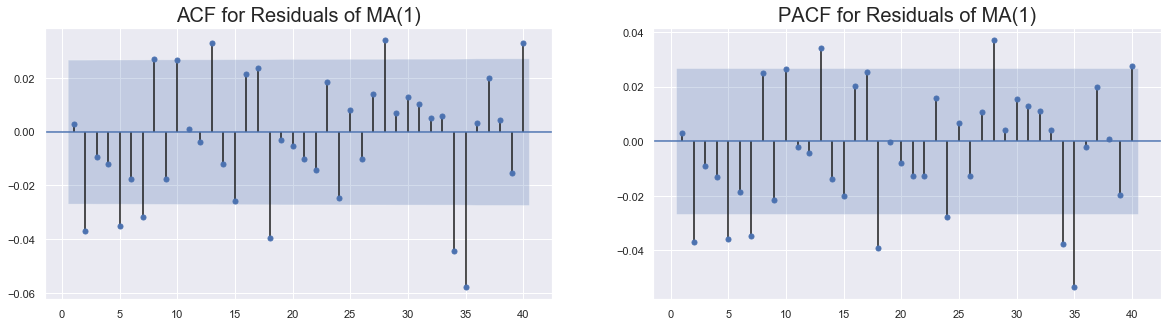

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
MA(2) MODEL
                              ARMA Model Results                              
Dep. Variable:                spx_ret   No. Observations:                 5352
Model:                     ARMA(0, 2)   Log Likelihood               -8480.584
Method:                       css-mle   S.D. of innovations              1.180
Date:                Sat, 13 Jun 2020   AIC                          16969.168
Time:                        15:04:13   BIC                          16995.509
Sample:                    01-07-1994   HQIC                         16978.368
                         - 07-14-2014              

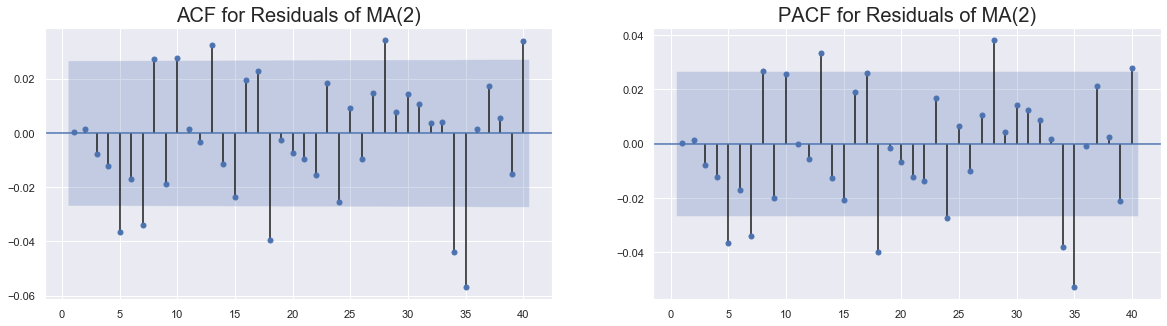

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
MA(3) MODEL
                              ARMA Model Results                              
Dep. Variable:                spx_ret   No. Observations:                 5352
Model:                     ARMA(0, 3)   Log Likelihood               -8480.276
Method:                       css-mle   S.D. of innovations              1.180
Date:                Sat, 13 Jun 2020   AIC                          16970.552
Time:                        15:04:14   BIC                          17003.478
Sample:                    01-07-1994   HQIC                         16982.052
                         - 07-14-2014              

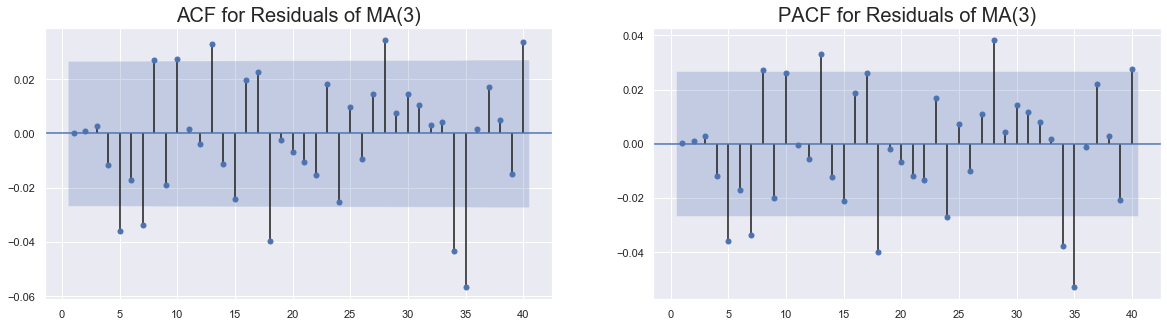

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
MA(4) MODEL
                              ARMA Model Results                              
Dep. Variable:                spx_ret   No. Observations:                 5352
Model:                     ARMA(0, 4)   Log Likelihood               -8479.648
Method:                       css-mle   S.D. of innovations              1.180
Date:                Sat, 13 Jun 2020   AIC                          16971.296
Time:                        15:04:15   BIC                          17010.808
Sample:                    01-07-1994   HQIC                         16985.097
                         - 07-14-2014              

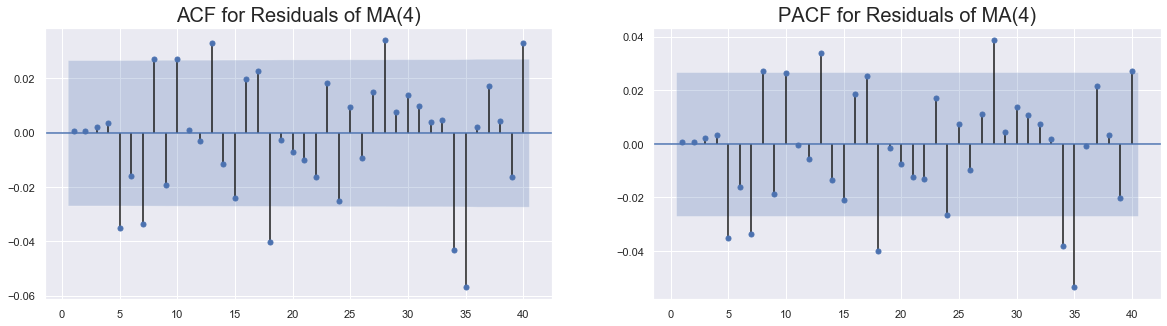

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
MA(5) MODEL
                              ARMA Model Results                              
Dep. Variable:                spx_ret   No. Observations:                 5352
Model:                     ARMA(0, 5)   Log Likelihood               -8476.036
Method:                       css-mle   S.D. of innovations              1.179
Date:                Sat, 13 Jun 2020   AIC                          16966.072
Time:                        15:04:16   BIC                          17012.168
Sample:                    01-07-1994   HQIC                         16982.172
                         - 07-14-2014              

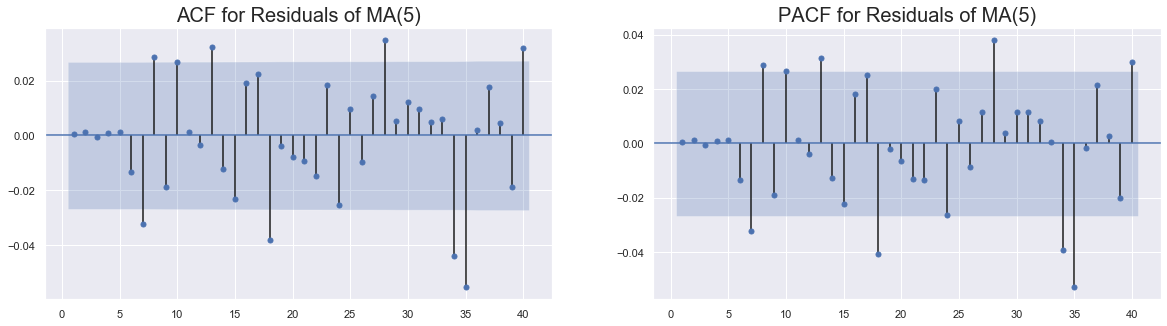

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
MA(6) MODEL
                              ARMA Model Results                              
Dep. Variable:                spx_ret   No. Observations:                 5352
Model:                     ARMA(0, 6)   Log Likelihood               -8475.495
Method:                       css-mle   S.D. of innovations              1.179
Date:                Sat, 13 Jun 2020   AIC                          16966.990
Time:                        15:04:17   BIC                          17019.672
Sample:                    01-07-1994   HQIC                         16985.391
                         - 07-14-2014              

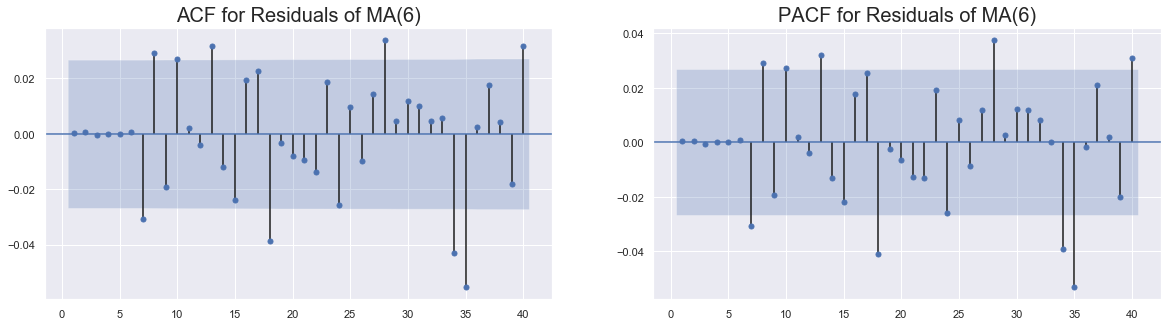

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
MA(7) MODEL
                              ARMA Model Results                              
Dep. Variable:                spx_ret   No. Observations:                 5352
Model:                     ARMA(0, 7)   Log Likelihood               -8473.205
Method:                       css-mle   S.D. of innovations              1.179
Date:                Sat, 13 Jun 2020   AIC                          16964.410
Time:                        15:04:18   BIC                          17023.677
Sample:                    01-07-1994   HQIC                         16985.110
                         - 07-14-2014              

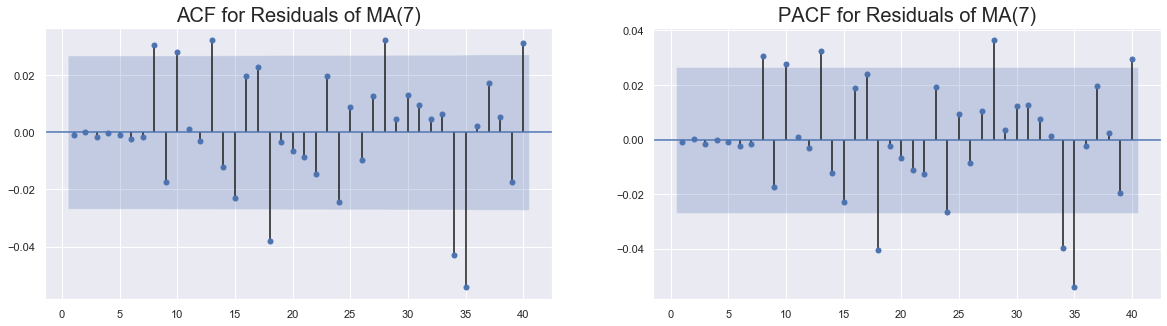

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
MA(8) MODEL
                              ARMA Model Results                              
Dep. Variable:                spx_ret   No. Observations:                 5352
Model:                     ARMA(0, 8)   Log Likelihood               -8470.772
Method:                       css-mle   S.D. of innovations              1.178
Date:                Sat, 13 Jun 2020   AIC                          16961.544
Time:                        15:04:21   BIC                          17027.396
Sample:                    01-07-1994   HQIC                         16984.545
                         - 07-14-2014              

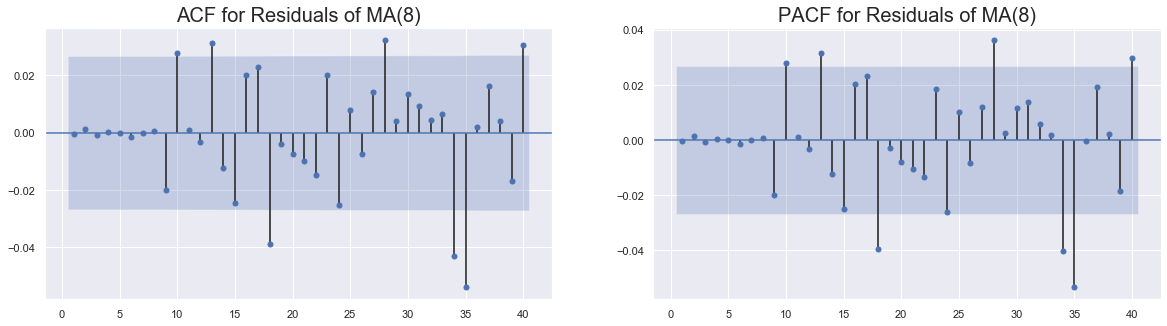

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
MA(9) MODEL
                              ARMA Model Results                              
Dep. Variable:                spx_ret   No. Observations:                 5352
Model:                     ARMA(0, 9)   Log Likelihood               -8469.810
Method:                       css-mle   S.D. of innovations              1.178
Date:                Sat, 13 Jun 2020   AIC                          16961.621
Time:                        15:04:24   BIC                          17034.058
Sample:                    01-07-1994   HQIC                         16986.922
                         - 07-14-2014              

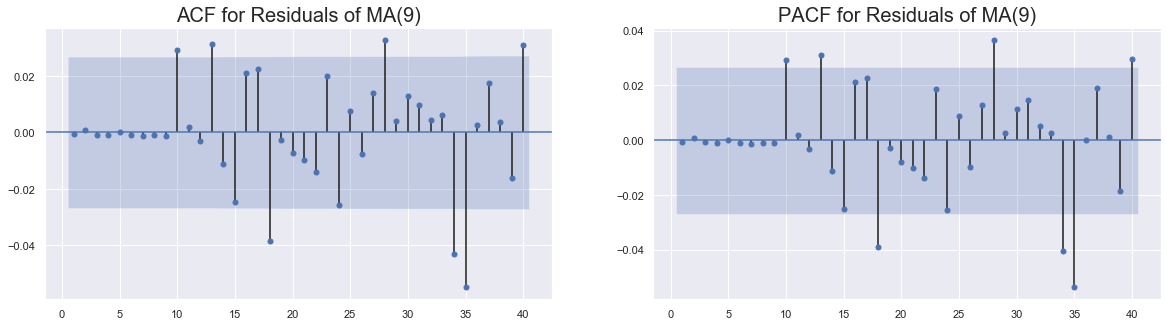

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
MA(10) MODEL
                              ARMA Model Results                              
Dep. Variable:                spx_ret   No. Observations:                 5352
Model:                    ARMA(0, 10)   Log Likelihood               -8467.289
Method:                       css-mle   S.D. of innovations              1.177
Date:                Sat, 13 Jun 2020   AIC                          16958.579
Time:                        15:04:29   BIC                          17037.602
Sample:                    01-07-1994   HQIC                         16986.180
                         - 07-14-2014             

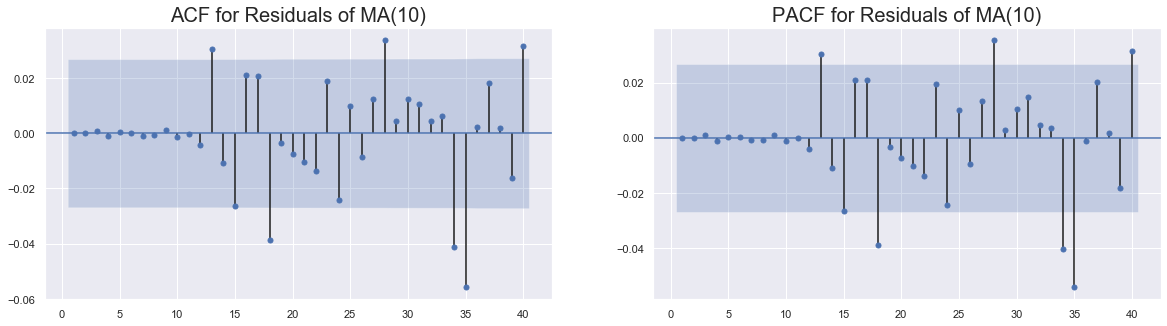

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------


In [9]:
for i in range(1, max_lags+1):
    ma_model = ARMA(train_df.spx_ret[1:], order=(0, i))
    ma_model_results = ma_model.fit()
    
    print("MA(%0.0f) MODEL" % i)
    print(ma_model_results.summary())
    acf_pacf(ma_model_results.resid, "Residuals of MA("+str(i)+")")
    
    print("-------------------------------------------------------------------------------------------------------------------------------")
    print("-------------------------------------------------------------------------------------------------------------------------------")
    print("-------------------------------------------------------------------------------------------------------------------------------")

#### LLR Test between models with significant coefficients

In [10]:
ma_1_ret = ARMA(train_df.spx_ret[1:], order=(0, 1)).fit()
ma_2_ret = ARMA(train_df.spx_ret[1:], order=(0, 2)).fit()
ma_3_ret = ARMA(train_df.spx_ret[1:], order=(0, 3)).fit()
ma_4_ret = ARMA(train_df.spx_ret[1:], order=(0, 4)).fit()
ma_5_ret = ARMA(train_df.spx_ret[1:], order=(0, 5)).fit()
ma_6_ret = ARMA(train_df.spx_ret[1:], order=(0, 6)).fit()
ma_7_ret = ARMA(train_df.spx_ret[1:], order=(0, 7)).fit()
ma_8_ret = ARMA(train_df.spx_ret[1:], order=(0, 8)).fit()
ma_9_ret = ARMA(train_df.spx_ret[1:], order=(0, 9)).fit()
ma_10_ret = ARMA(train_df.spx_ret[1:], order=(0, 10)).fit()

In [11]:
LLR_test(ma_1_ret, ma_2_ret, DF=1)

0.005

In [12]:
LLR_test(ma_2_ret, ma_3_ret, DF=1)

0.433

In [13]:
LLR_test(ma_2_ret, ma_4_ret, DF=2)

0.392

In [14]:
LLR_test(ma_2_ret, ma_5_ret, DF=3)

0.028

In [15]:
LLR_test(ma_5_ret, ma_6_ret, DF=1)

0.298

In [16]:
LLR_test(ma_5_ret, ma_7_ret, DF=2)

0.059

In [17]:
LLR_test(ma_5_ret, ma_8_ret, DF=3)

0.015

In [18]:
LLR_test(ma_8_ret, ma_9_ret, DF=1)

0.165

In [19]:
LLR_test(ma_8_ret, ma_10_ret, DF=2)

0.031

#### Predictions over Test Set

In [20]:
start_date, end_date = test_df.index[0], test_df.index[-1]

In [21]:
pred_df_ret = ma_10_ret.predict(start = start_date, end = end_date)

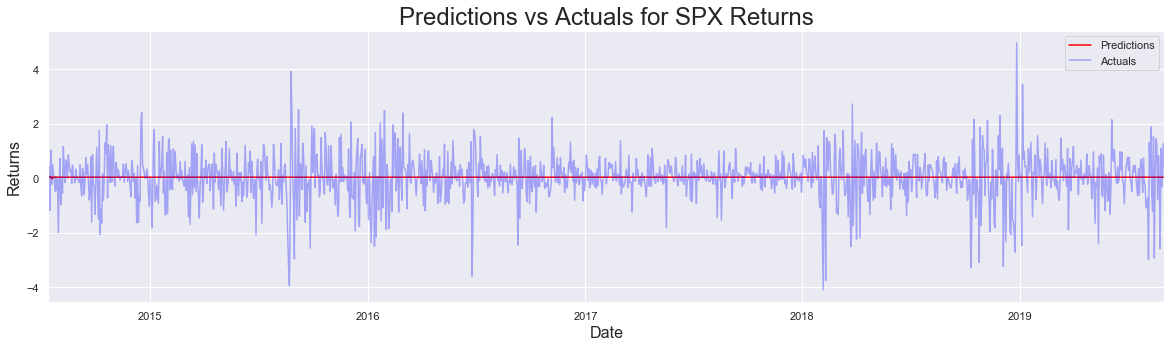

In [22]:
pred_df_ret[start_date:end_date].plot(figsize = (20,5), color = "red", label='Predictions')
test_df.spx_ret[start_date:end_date].plot(color = "blue", label='Actuals', alpha=0.3)

plt.title("Predictions vs Actuals for SPX Returns", size = 24)
plt.xlabel('Date', size=16)
plt.ylabel('Returns', size=16)

plt.legend()
plt.show()

# MAX For SPX Returns

#### ACF and PACF Plots for SPX Returns

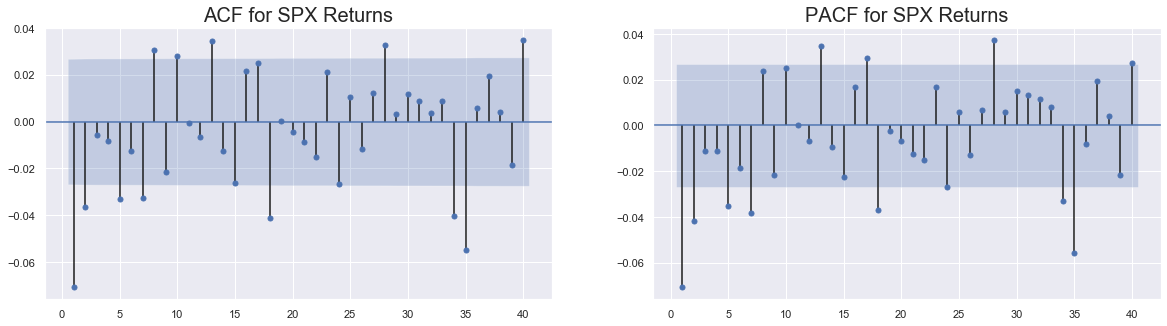

In [23]:
acf_pacf(train_df.spx_ret[1:], "SPX Returns")

#### Defining Max Lags based on ACF and PACF plots

In [24]:
max_lags = 5

#### Fitting all models with lags $<=$ max_lags

MA(1) MODEL
                              ARMA Model Results                              
Dep. Variable:                spx_ret   No. Observations:                 5352
Model:                     ARMA(0, 1)   Log Likelihood               -7249.979
Method:                       css-mle   S.D. of innovations              0.938
Date:                Sat, 13 Jun 2020   AIC                          14507.958
Time:                        15:04:43   BIC                          14534.299
Sample:                    01-07-1994   HQIC                         14517.158
                         - 07-14-2014                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0146      0.009      1.664      0.096      -0.003       0.032
dax_ret           0.5014      0.009     58.489      0.000       0.485       0.518
ma.L1.spx_ret    -0.3156    

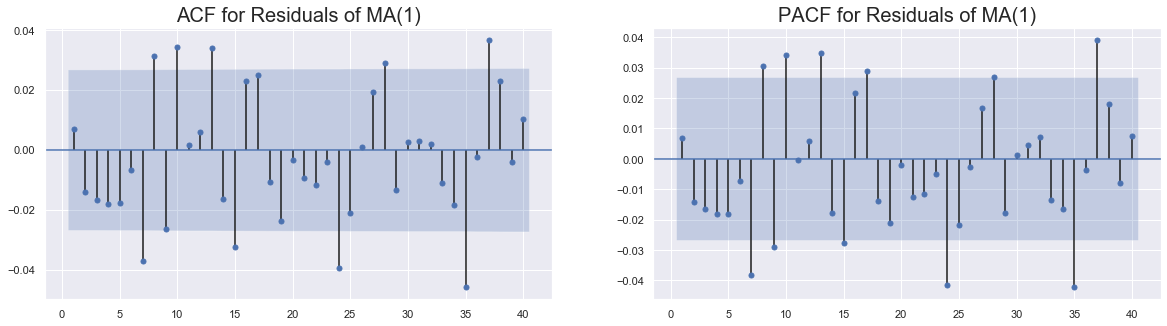

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
MA(2) MODEL
                              ARMA Model Results                              
Dep. Variable:                spx_ret   No. Observations:                 5352
Model:                     ARMA(0, 2)   Log Likelihood               -7248.644
Method:                       css-mle   S.D. of innovations              0.937
Date:                Sat, 13 Jun 2020   AIC                          14507.287
Time:                        15:04:44   BIC                          14540.213
Sample:                    01-07-1994   HQIC                         14518.788
                         - 07-14-2014              

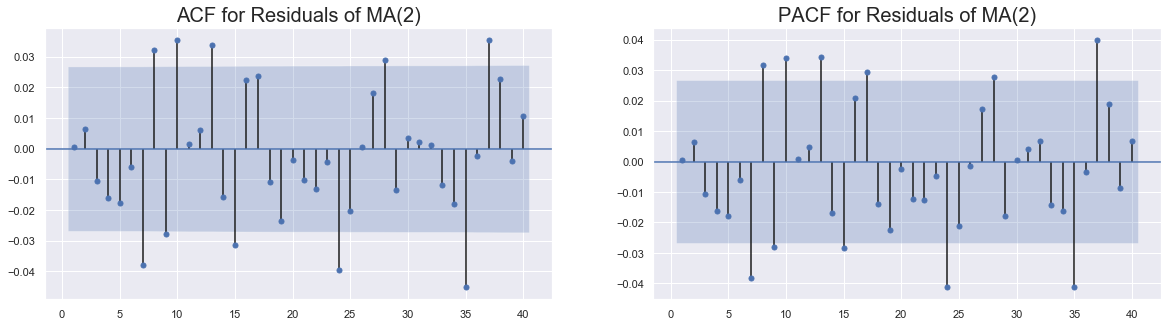

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
MA(3) MODEL
                              ARMA Model Results                              
Dep. Variable:                spx_ret   No. Observations:                 5352
Model:                     ARMA(0, 3)   Log Likelihood               -7247.729
Method:                       css-mle   S.D. of innovations              0.937
Date:                Sat, 13 Jun 2020   AIC                          14507.458
Time:                        15:04:45   BIC                          14546.969
Sample:                    01-07-1994   HQIC                         14521.258
                         - 07-14-2014              

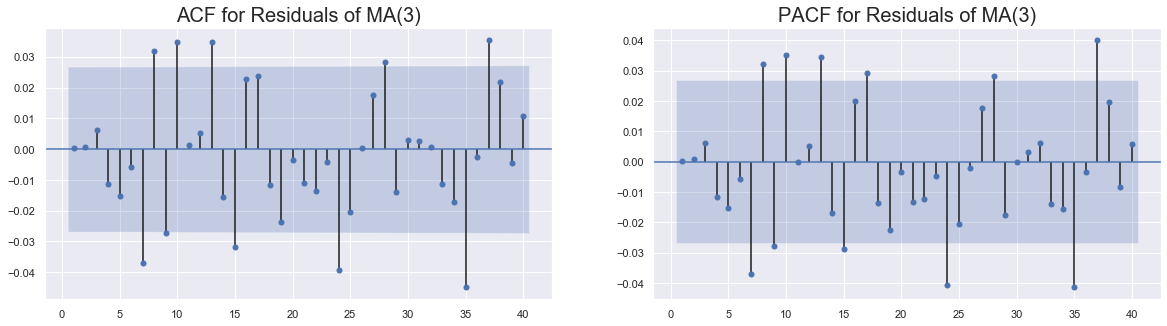

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
MA(4) MODEL
                              ARMA Model Results                              
Dep. Variable:                spx_ret   No. Observations:                 5352
Model:                     ARMA(0, 4)   Log Likelihood               -7246.884
Method:                       css-mle   S.D. of innovations              0.937
Date:                Sat, 13 Jun 2020   AIC                          14507.769
Time:                        15:04:46   BIC                          14553.865
Sample:                    01-07-1994   HQIC                         14523.869
                         - 07-14-2014              

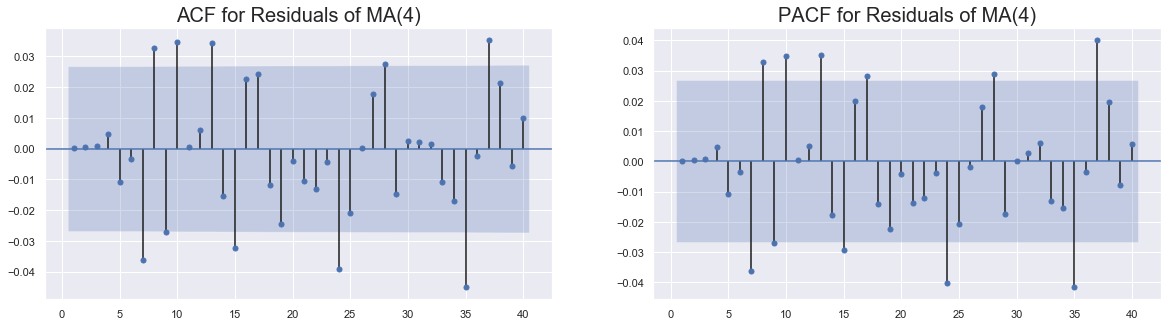

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
MA(5) MODEL
                              ARMA Model Results                              
Dep. Variable:                spx_ret   No. Observations:                 5352
Model:                     ARMA(0, 5)   Log Likelihood               -7246.346
Method:                       css-mle   S.D. of innovations              0.937
Date:                Sat, 13 Jun 2020   AIC                          14508.693
Time:                        15:04:47   BIC                          14561.375
Sample:                    01-07-1994   HQIC                         14527.093
                         - 07-14-2014              

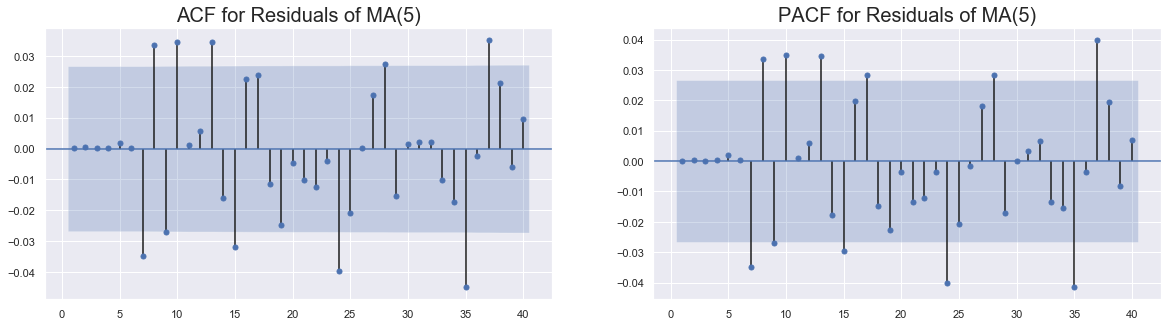

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------


In [25]:
for i in range(1, max_lags+1):
    ma_model = ARMA(train_df.spx_ret[1:], order=(0, i), exog=train_df.dax_ret[1:])
    ma_model_results = ma_model.fit()
    
    print("MA(%0.0f) MODEL" % i)
    print(ma_model_results.summary())
    acf_pacf(ma_model_results.resid, "Residuals of MA("+str(i)+")")
    
    print("-------------------------------------------------------------------------------------------------------------------------------")
    print("-------------------------------------------------------------------------------------------------------------------------------")
    print("-------------------------------------------------------------------------------------------------------------------------------")

#### LLR Test between models with significant coefficients

In [26]:
ma_1_exog_ret = ARMA(train_df.spx_ret[1:], order=(0, 1), exog=train_df.dax_ret[1:]).fit()
ma_2_exog_ret = ARMA(train_df.spx_ret[1:], order=(0, 2), exog=train_df.dax_ret[1:]).fit()
ma_3_exog_ret = ARMA(train_df.spx_ret[1:], order=(0, 2), exog=train_df.dax_ret[1:]).fit()
ma_4_exog_ret = ARMA(train_df.spx_ret[1:], order=(0, 4), exog=train_df.dax_ret[1:]).fit()
ma_5_exog_ret = ARMA(train_df.spx_ret[1:], order=(0, 5), exog=train_df.dax_ret[1:]).fit()

In [27]:
LLR_test(ma_1_exog_ret, ma_2_exog_ret, DF=1)

0.102

In [28]:
LLR_test(ma_1_exog_ret, ma_3_exog_ret, DF=2)

0.263

In [29]:
LLR_test(ma_1_exog_ret, ma_4_exog_ret, DF=3)

0.103

In [30]:
LLR_test(ma_1_exog_ret, ma_5_exog_ret, DF=4)

0.123

#### Predictions over Test Set

In [31]:
start_date, end_date = test_df.index[0], test_df.index[-1]

In [32]:
pred_df_exog_ret = ma_1_exog_ret.predict(start=start_date, end=end_date, exog=test_df.dax_ret)

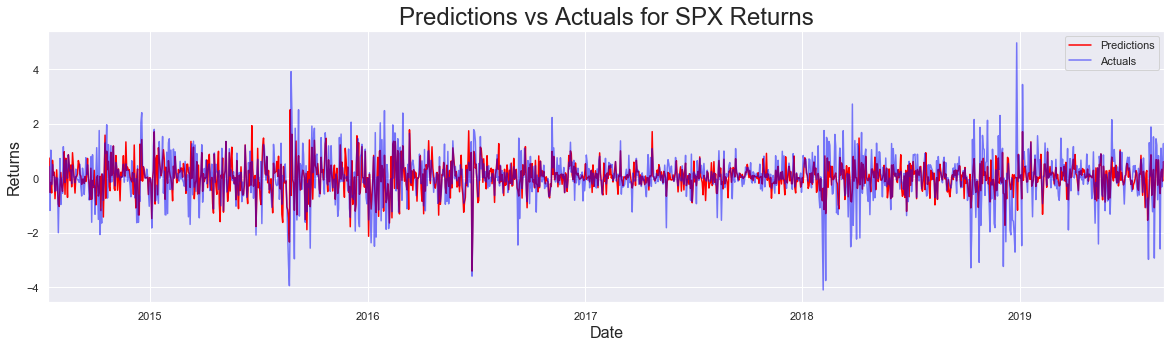

In [33]:
pred_df_exog_ret[start_date:end_date].plot(figsize = (20,5), color = "red", label='Predictions')
test_df.spx_ret[start_date:end_date].plot(color = "blue", label='Actuals', alpha=0.5)

plt.title("Predictions vs Actuals for SPX Returns", size = 24)
plt.xlabel('Date', size=16)
plt.ylabel('Returns', size=16)

plt.legend()
plt.show()

# Comparing Prediction Accuracies

In [34]:
start, end = test_df.index[0], test_df.index[-1]

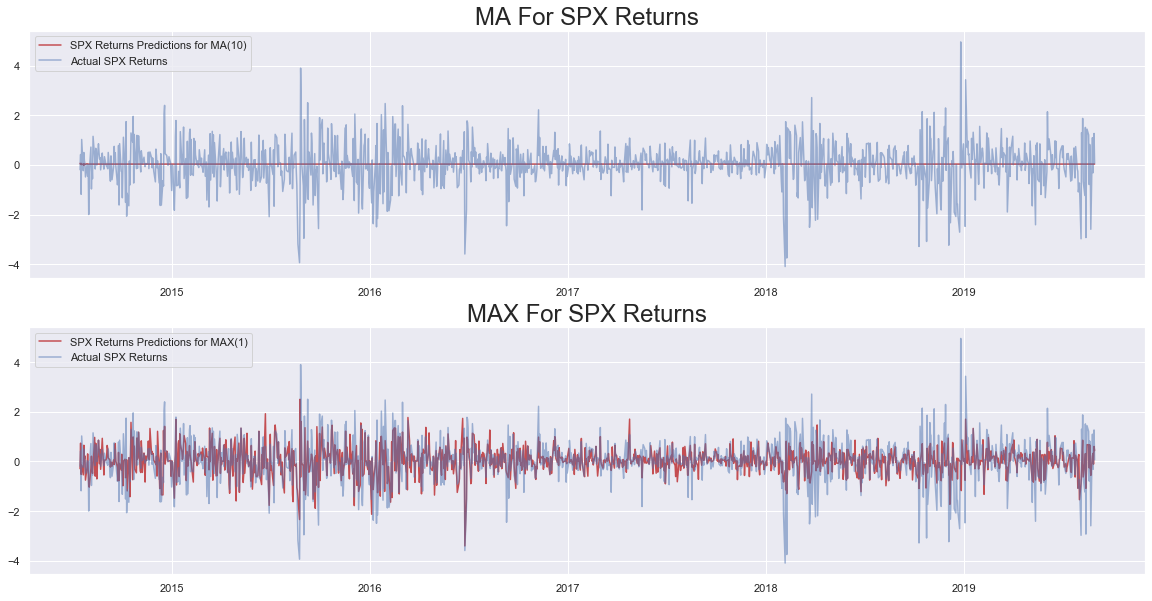

In [35]:
plt.rcParams['figure.figsize'] = 20, 10

fig, ax = plt.subplots(2, 1)

ax[0].plot(pred_df_ret[start:end], color='r', label='SPX Returns Predictions for MA(10)')
ax[0].plot(test_df.spx_ret[start:end], color='b', label='Actual SPX Returns', alpha=0.5)
ax[0].set_title('MA For SPX Returns', size=24)
ax[0].legend()

ax[1].plot(pred_df_exog_ret[start:end], color='r', label='SPX Returns Predictions for MAX(1)')
ax[1].plot(test_df.spx_ret[start:end], color='b', label='Actual SPX Returns', alpha=0.5)
ax[1].set_title('MAX For SPX Returns', size=24)
ax[1].legend()

plt.show()

#### RMSE: MA(10) on SPX Returns

In [36]:
mse = mean_squared_error(test_df.spx_ret.values, pred_df_ret.values)
rmse = sqrt(mse)

print("Root Mean Squared Error: "+str(rmse))

Root Mean Squared Error: 0.8390290408296484


#### RMSE: MAX(1) on SPX Returns

In [37]:
mse = mean_squared_error(test_df.spx_ret.values, pred_df_exog_ret.values)
rmse = sqrt(mse)

print("Root Mean Squared Error: "+str(rmse))

Root Mean Squared Error: 0.7295746252392593
